In [2]:
# ROC Curve + Pearson Correlation
# Paper Reference: https://www.sciencedirect.com/science/article/pii/S0165027014004117?via%3Dihub#bib0280

import numpy as np 
import scipy.io as sio
from sklearn.metrics import auc

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn as default plotting style
sns.set()

In [3]:
# Load the Sample Data Set 
mat_data = sio.loadmat('../Data/ExampleDataSet_MonkeyData.mat');

# Extract a sample of the data
sample_freq = mat_data['sample_Hz'][0]
spike_train = mat_data['SpikeTrains'][1,:,18]

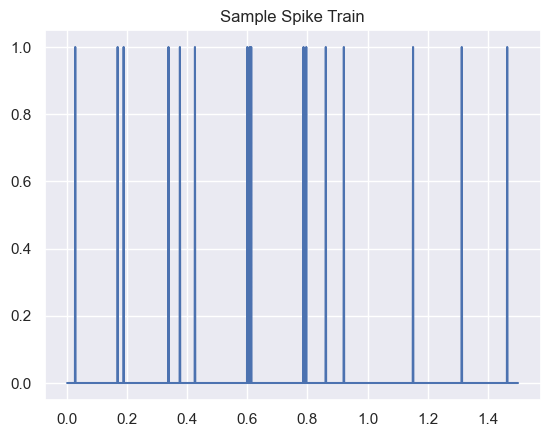

In [4]:
# Plot the sample spike train 
time_vec = np.arange(1, (spike_train.shape[0])+1)/sample_freq
sns.lineplot(x = time_vec, y = spike_train)
plt.title('Sample Spike Train')
plt.show()

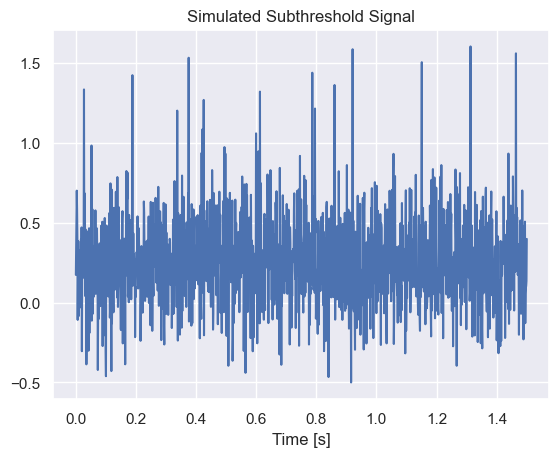

In [9]:
# Simulate a continuous signal similar to sandler et al. to demonstrate method
#
# Side Note for Simulation: if you increase the standard deviation of this signal you can see how more 
# noise may affect the ROC curve
std_dev = 0.25
mean_val = 0.25
gaussian_noise = np.random.normal(loc = mean_val, scale = std_dev, size = len(time_vec))

# Develop a Sub-threshold signal by adding guassian noise to the spike train
subthreshold_signal = spike_train + gaussian_noise
sns.lineplot( x = time_vec, y = subthreshold_signal)
plt.title('Simulated Subthreshold Signal')
plt.xlabel('Time [s]') 
plt.show()

In [10]:
# Loop through low and High Thresholds for the Signal 
step_size = round(max(subthreshold_signal),2)/3
thresholds = np.arange(round(min(subthreshold_signal)), round(max(subthreshold_signal),2), step_size)

# Identify indices equal to one in original spike train
spike_true, = np.where(spike_train == 1)
no_spike_true = np.where(spike_train == 0)

roc_tpr = np.zeros(len(thresholds), dtype = float)
roc_fpr = np.zeros(len(thresholds), dtype = float)

# Calculate the False Positive and True Positive Rate for increasing threshold
for indx,thresh_val in enumerate(thresholds):
    spike_pred, = np.where(subthreshold_signal > thresh_val)
    no_spike_pred = np.where(subthreshold_signal <= thresh_val)

    overlap = np.intersect1d(spike_pred, spike_true)
    TP = len(overlap)
    FP = len(spike_pred) - TP
    FN = len(spike_true) - TP
    TN = len(np.intersect1d(no_spike_true, no_spike_pred))

    roc_tpr[indx] = TP / (TP + FN)
    roc_fpr[indx] = FP / (FP + TN)


In [11]:
# Last Calculation -
# Method also evaluations the pearson correlation between ground truth and predicted
mean_centered_pred = subthreshold_signal - np.mean(subthreshold_signal)
mean_centered_true = spike_train - np.mean(spike_train)
denom_val = np.var(subthreshold_signal)*np.var(spike_train)

pearson_corr = np.mean( mean_centered_pred * mean_centered_true) / np.sqrt(denom_val)
print(pearson_corr)

0.40373266536646873


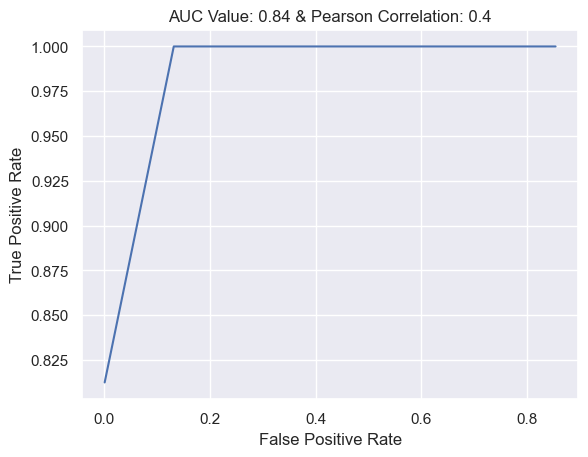

In [12]:
# Calculate the Area Under the Curve to Quantify Overall Performance
auc_score = auc(roc_fpr, roc_tpr)

sns.lineplot( x = roc_fpr, y = roc_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"AUC Value: {np.round(auc_score,2)} & Pearson Correlation: {np.round(pearson_corr,2)}")
plt.show()